# **Tugas Besar Pembelajaran Mesin**

Naufal Haritsah Luthfi   - 1301194073

>
>

**Library Yang Digunakan :**

1. Pandas, sebagai alat bantu statistik dalam pengolahan data
2. Seaborn, sebagai library tambahan dalam visualisasi data
3. Numpy, sebagai alat bantu operasi komputasi tipe data numerik
4. Matplotlib, sebagai library tambahan dalam visualisasi data
5. random, sebagai alat untuk mencari nilai random
6. sklearn.cluster, yang digunakan hanya untuk evaluasi model

##**Import Library**

In [1]:
#Import Library
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.cluster import KMeans

##**Import Dataset**

In [2]:
#Import Dataset
!gdown --id 1hsffcmhRqtm6HuXJBl_JrIqNT8R7smq7

Downloading...
From: https://drive.google.com/uc?id=1hsffcmhRqtm6HuXJBl_JrIqNT8R7smq7
To: /content/kendaraan_train.csv
100% 15.2M/15.2M [00:00<00:00, 92.7MB/s]


##**Task Clustering**

###**Data Understanding**

In [3]:
#Proses Pembacaan Data dan Menampilkan 5 Data Pertama
data = pd.read_csv('kendaraan_train.csv')
data.head(5)

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0


In [4]:
#Melihat Count, Mean, std, Kuartil, Min, Max untuk setiap variabelnya
data.describe()

,id,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
count,285831.000000,271617.000000,271427.000000,271525.000000,271602.000000,271262.000000,271532.000000,271839.000000,285831.000000
mean,142916.000000,38.844336,0.997848,26.405410,0.458778,30536.683472,112.021567,154.286302,0.122471
std,82512.446734,15.522487,0.046335,13.252714,0.498299,17155.000770,54.202457,83.694910,0.327830
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,71458.500000,25.000000,1.000000,15.000000,0.000000,24398.000000,29.000000,82.000000,0.000000
50%,142916.000000,36.000000,1.000000,28.000000,0.000000,31646.000000,132.000000,154.000000,0.000000
75%,214373.500000,49.000000,1.000000,35.000000,1.000000,39377.750000,152.000000,227.000000,0.000000
max,285831.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [5]:
#Melihat Informasi Data Tersebut
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 285831 non-null  int64  
 1   Jenis_Kelamin      271391 non-null  object 
 2   Umur               271617 non-null  float64
 3   SIM                271427 non-null  float64
 4   Kode_Daerah        271525 non-null  float64
 5   Sudah_Asuransi     271602 non-null  float64
 6   Umur_Kendaraan     271556 non-null  object 
 7   Kendaraan_Rusak    271643 non-null  object 
 8   Premi              271262 non-null  float64
 9   Kanal_Penjualan    271532 non-null  float64
 10  Lama_Berlangganan  271839 non-null  float64
 11  Tertarik           285831 non-null  int64  
dtypes: float64(7), int64(2), object(3)
memory usage: 26.2+ MB


###**Eksplorasi dan Persiapan Data**


In [6]:
#Membuang Data Kolom ID dan Tertarik
data = data.drop(['id', 'Tertarik'], axis=1)
data.sample(5)

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
119321,Wanita,NaN,1.0,16.0,0.0,< 1 Tahun,NaN,32896.0,152.0,121.0
17606,Wanita,21.0,1.0,35.0,NaN,< 1 Tahun,Tidak,49632.0,160.0,96.0
231641,Pria,31.0,1.0,10.0,0.0,NaN,Pernah,34172.0,26.0,171.0
98047,Wanita,68.0,1.0,46.0,0.0,> 2 Tahun,Pernah,2630.0,26.0,16.0
204419,Pria,36.0,1.0,46.0,0.0,1-2 Tahun,Pernah,29200.0,124.0,156.0


In [7]:
#Pengecekan Missing Value Data
data.isnull().sum()

Jenis_Kelamin        14440
Umur                 14214
SIM                  14404
Kode_Daerah          14306
Sudah_Asuransi       14229
Umur_Kendaraan       14275
Kendaraan_Rusak      14188
Premi                14569
Kanal_Penjualan      14299
Lama_Berlangganan    13992
dtype: int64

In [9]:
#Export Dataset Setelah Drop Data
data.to_csv('data_kendaraan_setelah_drop.csv', index=False)

###**Pengecekan Data Kosong**

In [10]:
#Mengisi Nilai Data Dengan Nilai Tetangga, Rata-Rata, dan Modus
data['SIM'].fillna(method = 'ffill', inplace = True)
data['Kode_Daerah'] = data['Kode_Daerah'].replace(np.NaN, 28.0)
data['Jenis_Kelamin'].fillna(method = 'ffill', inplace = True)
data['Umur'] = data['Umur'].replace(np.NaN, data['Umur'].mean())
data['Sudah_Asuransi'].fillna(method = 'ffill', inplace = True)
data['Umur_Kendaraan'] = data['Umur_Kendaraan'].replace(np.NaN, "1-2 Tahun")
data['Kendaraan_Rusak'].fillna(method = 'ffill', inplace = True)
data['Premi'] = data['Premi'].replace(np.NaN, data['Premi'].mean())
data['Kanal_Penjualan'] = data['Kanal_Penjualan'].replace(np.NaN, 152.0)
data['Lama_Berlangganan'] = data['Lama_Berlangganan'].replace(np.NaN, data['Lama_Berlangganan'].mean())

In [11]:
#Pengecekan Missing Value Data
data.isna().sum()

Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
dtype: int64

In [12]:
#Export Dataset Setelah Mengisi Nilai Kosong
data.to_csv('data_kendaraan_setelah_mengisi_nilai_kosong.csv', index=False)

###**Normalisasi Data**


In [13]:
#Merubah Data Kategorikal Menjadi Numerikal
data['Jenis_Kelamin'] = data['Jenis_Kelamin'].replace("Wanita", 1) 
data['Jenis_Kelamin'] = data['Jenis_Kelamin'].replace("Pria", 0) 

data['Kendaraan_Rusak'] = data['Kendaraan_Rusak'].replace("Pernah", 1)
data['Kendaraan_Rusak'] = data['Kendaraan_Rusak'].replace("Tidak", 0)

data['Umur_Kendaraan'] = data['Umur_Kendaraan'].replace("< 1 Tahun", 1)
data['Umur_Kendaraan'] = data['Umur_Kendaraan'].replace("1-2 Tahun", 2)
data['Umur_Kendaraan'] = data['Umur_Kendaraan'].replace("> 2 Tahun", 3)

In [14]:
#Menampilkan 5 Data Pertama
data.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
0,1,30.0,1.0,33.0,1.0,1,0,28029.0,152.0,97.0
1,0,48.0,1.0,39.0,0.0,3,1,25800.0,29.0,158.0
2,0,21.0,1.0,46.0,1.0,1,0,32733.0,160.0,119.0
3,1,58.0,1.0,48.0,0.0,2,0,2630.0,124.0,63.0
4,0,50.0,1.0,35.0,0.0,3,0,34857.0,88.0,194.0


In [15]:
#Export Dataset Setelah Merubah Data Kategorikal Menjadi Numerikal
data.to_csv('data_kendaraan_setelah_merubah_data_kategorikal.csv', index=False)

In [16]:
#MAX Scaling
for column in data.columns:
    data[column] = data[column]  / data[column].abs().max()

data.sample()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
62085,1.0,0.682353,1.0,0.538462,0.0,0.666667,1.0,0.004869,0.760736,0.531773


In [17]:
#Export Dataset Setelah Proses Max Scalling
data.to_csv('data_kendaraan_setelah_proses_max_scalling.csv', index=False)

###**Pengecekan Outlier**


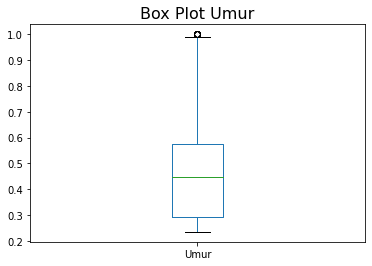

In [18]:
#Boxplot Variabel Umur
data['Umur'].plot(kind='box', figsize=(6, 4))

plt.title('Box Plot Umur', size=16)
plt.show()

In [20]:
#Proses IQR Menghilangkan Outlier Pada Variabel Umur
data_umur = data['Umur']
q1 = np.percentile(data_umur, 25)
q3 = np.percentile(data_umur, 75)

IQR = q3-q1
bawah = q1-(1.5*IQR)
atas = q3+(1.5*IQR)

for i in range(len(data['Umur'])):
   if data['Umur'][i] < bawah:
     data['Umur'][i] = bawah
   if data['Umur'][i] > atas:
     data['Umur'][i] = atas

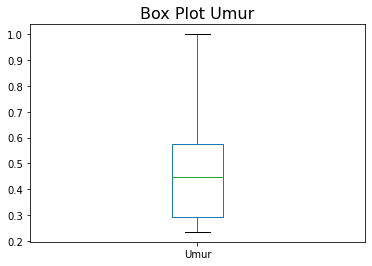

In [21]:
#Boxplot Variabel Umur
data['Umur'].plot(kind='box', figsize=(6, 4))

plt.title('Box Plot Umur', size=16)
plt.show()

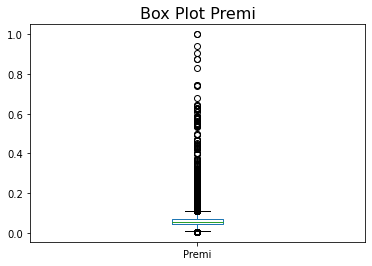

In [22]:
#Boxplot Variabel Premi
data['Premi'].plot(kind='box', figsize=(6, 4))

plt.title('Box Plot Premi', size=16)
plt.show()

In [23]:
#Proses IQR Menghilangkan Outlier Pada Variabel Premi
data_premi = data['Premi']
q1 = np.percentile(data_premi, 25)
q3 = np.percentile(data_premi, 75)

IQR = q3-q1
bawah = q1-(1.5*IQR)
atas = q3+(1.5*IQR)

for i in range(len(data['Premi'])):
   if data['Premi'][i] < bawah:
     data['Premi'][i] = bawah
   if data['Premi'][i] > atas:
     data['Premi'][i] = atas

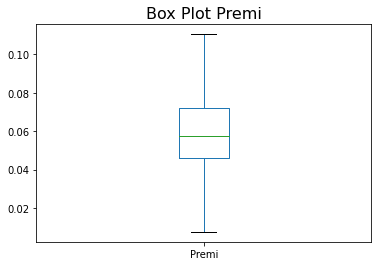

In [24]:
#Boxplot Variabel Premi
data['Premi'].plot(kind='box', figsize=(6, 4))

plt.title('Box Plot Premi', size=16)
plt.show()

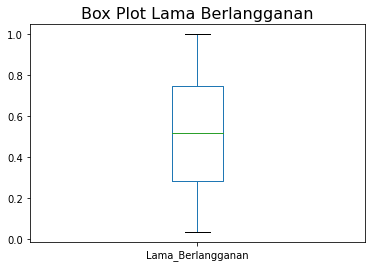

In [25]:
#Boxplot Variabel Lama Berlangganan
data['Lama_Berlangganan'].plot(kind='box', figsize=(6, 4))

plt.title('Box Plot Lama Berlangganan', size=16)
plt.show()

In [26]:
#Export Dataset Setelah Menghilangkan Outlier Untuk Variabel Umur dan Premi
data.to_csv('data_kendaraan_setelah_menghilangkan_outlier.csv', index=False)

###**Pemodelan Data**

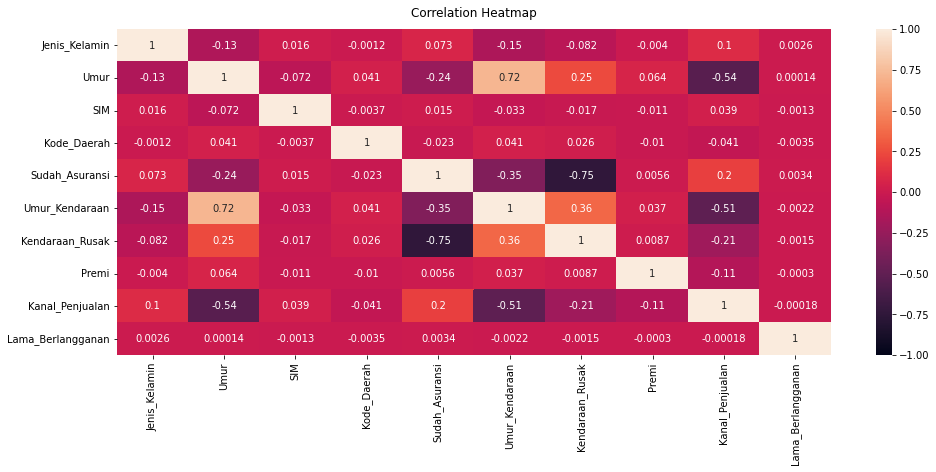

In [ ]:
#Correlation Heatmap
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

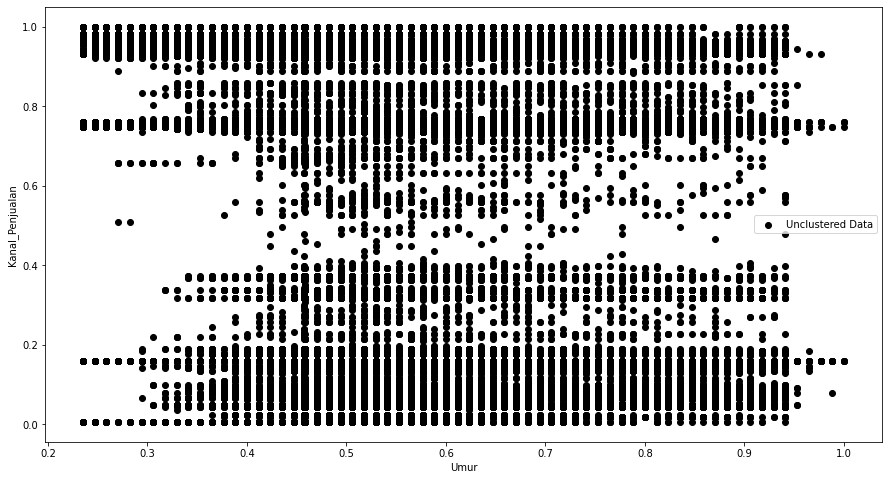

In [ ]:
#Scatter Plot Variabel Umur Terhadap Kanal_Penjualan
plt.figure(figsize=(15,8))
plt.scatter(data['Umur'], data['Kanal_Penjualan'], color='black', label="Unclustered Data")
plt.legend()
plt.xlabel("Umur")
plt.ylabel("Kanal_Penjualan")
plt.show()

In [ ]:
#Proses K-Means
X = data.iloc[:, [1, 8]].values

m=X.shape[0] 
n=X.shape[1]

def kmeans(K, n_iter):
  Centroids=np.array([]).reshape(n,0) 

  for i in range(K):
      rand=random.randint(0,m-1)
      Centroids=np.c_[Centroids,X[rand]]

  Output={}

  EuclidianDistance=np.array([]).reshape(m,0)
  for k in range(K): # melakukan perulangan untuk menghitung jarak setiap data pada dataset
    tempDist=np.sum((X-Centroids[:,k])**2,axis=1)
    EuclidianDistance=np.c_[EuclidianDistance,tempDist]

  C=np.argmin(EuclidianDistance,axis=1)+1

  Y={}
  for k in range(K):
      Y[k+1]=np.array([]).reshape(2,0)
  for i in range(m):
      Y[C[i]]=np.c_[Y[C[i]],X[i]]
      
  for k in range(K):
      Y[k+1]=Y[k+1].T
      
  for k in range(K):
      Centroids[:,k]=np.mean(Y[k+1],axis=0)

  for i in range(n_iter):
        EuclidianDistance=np.array([]).reshape(m,0)
        for k in range(K):
          tempDist=np.sum((X-Centroids[:,k])**2,axis=1)
          EuclidianDistance=np.c_[EuclidianDistance,tempDist]

        C=np.argmin(EuclidianDistance,axis=1)+1
      
        Y={}
        for k in range(K):
            Y[k+1]=np.array([]).reshape(2,0)
        for i in range(m):
            Y[C[i]]=np.c_[Y[C[i]],X[i]]
      
        for k in range(K):
            Y[k+1]=Y[k+1].T
      
        for k in range(K):
            Centroids[:,k]=np.mean(Y[k+1],axis=0)
        Output=Y 

  return Centroids, Output

In [ ]:
#Inisiasi k, serta Iterasi K-Means
K = 2
Centroids, Output = kmeans(K, 10)

/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


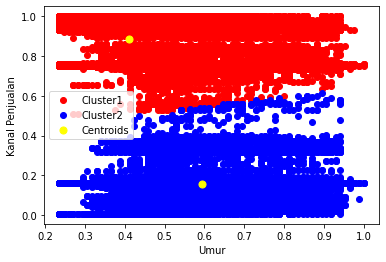

In [ ]:
#Visualisasi Data Setelah Di Clustering dengan k = 2
color=['red','blue']
labels=['Cluster1','Cluster2']
for k in range(K):
    plt.scatter(Output[k+1][:,0],Output[k+1][:,1],c=color[k],label=labels[k])
plt.scatter(Centroids[0,:],Centroids[1,:],s=50,c='yellow',label='Centroids')
plt.xlabel('Umur')
plt.ylabel('Kanal Penjualan')
plt.legend()
plt.show()

###**Evaluasi**

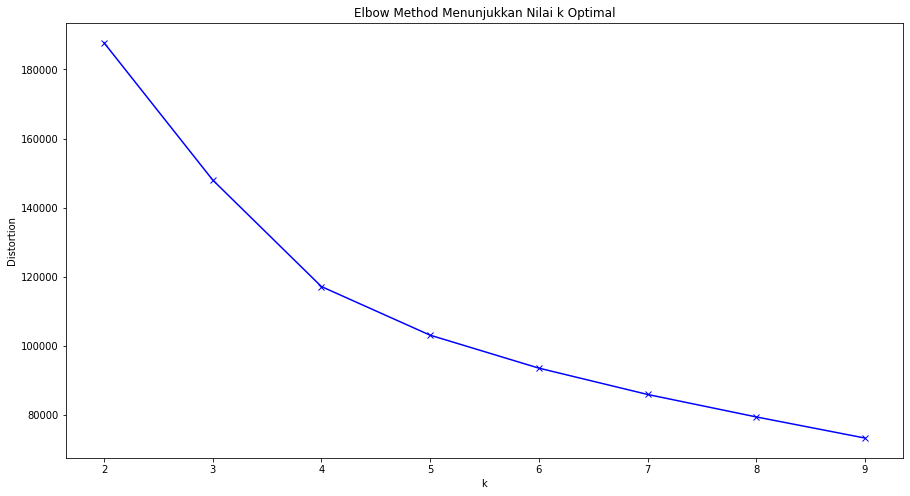

In [ ]:
#Elbow Method Menentukan k Optimal
distortions = []
k = range(2, 10)
for i in k:
    kmeanModel = KMeans(n_clusters=i)
    kmeanModel = kmeanModel.fit(data)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(15,8))
plt.plot(k, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Elbow Method Menunjukkan Nilai k Optimal')
plt.show()

###**Eksperimen**

In [ ]:
#Inisiasi k, serta Iterasi K-Means
K = 2
Centroids, Output = kmeans(K, 10)

/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


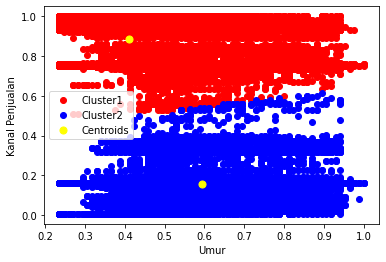

In [ ]:
#Visualisasi Data Setelah Di Clustering dengan k = 2
color=['red','blue']
labels=['Cluster1','Cluster2']
for k in range(K):
    plt.scatter(Output[k+1][:,0],Output[k+1][:,1],c=color[k],label=labels[k])
plt.scatter(Centroids[0,:],Centroids[1,:],s=50,c='yellow',label='Centroids')
plt.xlabel('Umur')
plt.ylabel('Kanal Penjualan')
plt.legend()
plt.show()

In [ ]:
#Inisiasi k, serta Iterasi K-Means
n_iter=10
K= 4

Centroids, Output = kmeans(K, n_iter)

/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


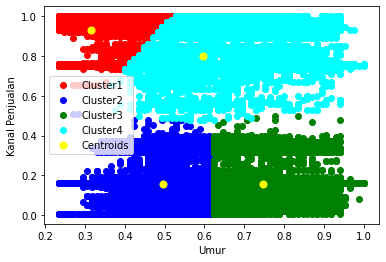

In [ ]:
#Visualisasi Data Setelah Di Clustering dengan k = 4
color=['red','blue','green', 'cyan']
labels=['Cluster1','Cluster2','Cluster3','Cluster4']
for k in range(K):
    plt.scatter(Output[k+1][:,0],Output[k+1][:,1],c=color[k],label=labels[k])
plt.scatter(Centroids[0,:],Centroids[1,:],s=50,c='yellow',label='Centroids')
plt.xlabel('Umur')
plt.ylabel('Kanal Penjualan')
plt.legend()
plt.show()